# Recurrent Neural Networks (RNNs) with TensorFlow

## Import Libraries

In [14]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers, losses
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
def plot_predicted_vs_actual(y_true, y_pred, title="Predicted vs Actual"):
    plt.figure(figsize=(8, 8))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(title)
    plt.grid()
    plt.show()

### Create a timeseries dataset

In [2]:
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))  # wave 1
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20))  # wave 2
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5) # add noise
    return series[..., np.newaxis].astype(np.float32)

In [3]:
n_steps = 50
series = generate_time_series(10000, n_steps + 1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

### Base Prediction Method

In [10]:
y_pred = X_valid[:, -1]
baseline_mse = np.mean(losses.mse(y_valid, y_pred))
print("Baseline MSE:", baseline_mse)

Baseline MSE: 0.02097422


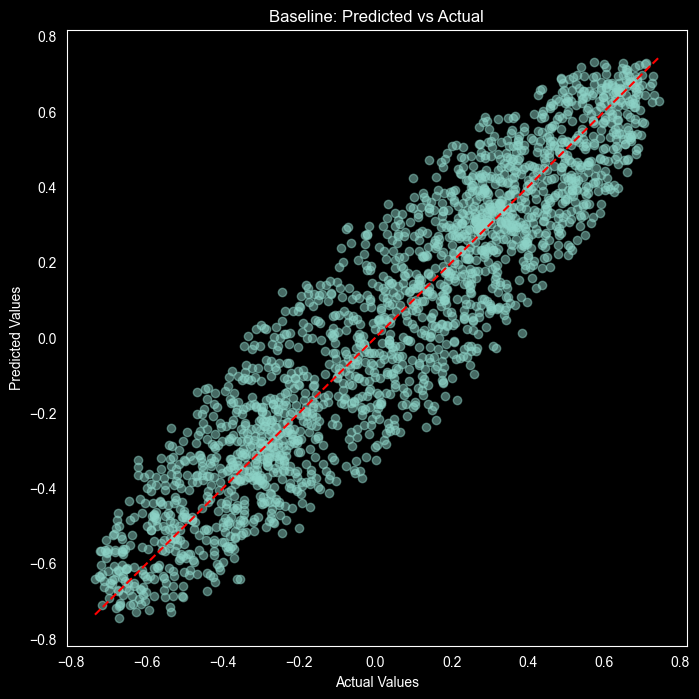

In [16]:
plot_predicted_vs_actual(y_valid, y_pred, title="Baseline: Predicted vs Actual")

### Simple Dense Model

In [18]:
model = keras.models.Sequential([
    layers.Flatten(input_shape=[n_steps, 1]),
    layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
dense_mse = model.evaluate(X_test, y_test)
print("Dense Model MSE:", dense_mse)

Epoch 1/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2000 - val_loss: 0.0832
Epoch 2/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0432 - val_loss: 0.0236
Epoch 3/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0153 - val_loss: 0.0117
Epoch 4/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0090 - val_loss: 0.0081
Epoch 5/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0068 - val_loss: 0.0065
Epoch 6/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0058 - val_loss: 0.0058
Epoch 7/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0053 - val_loss: 0.0054
Epoch 8/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0050 - val_loss: 0.0052
Epoch 9/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0047 - val_loss: 0.0050
Epoch 10/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0046 - val_loss: 0.0048
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0045 
Dense Model MSE: 0.004480378702282906


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


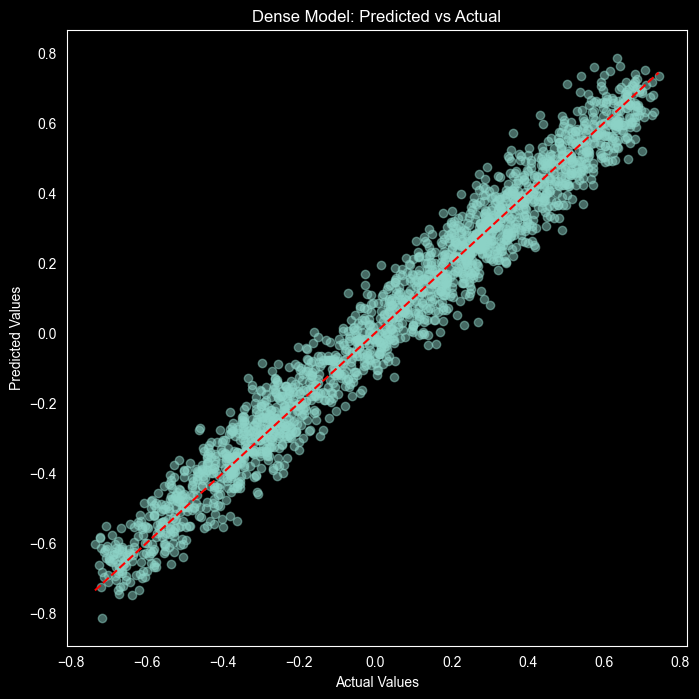

In [19]:
y_pred = model.predict(X_valid)
plot_predicted_vs_actual(y_valid, y_pred, title="Dense Model: Predicted vs Actual")

### Simple RNN Model

In [20]:
model = keras.models.Sequential([
    layers.Input(shape=(n_steps, 1)),
    layers.SimpleRNN(20, return_sequences=True),
    layers.SimpleRNN(20),
    layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
rnn_mse = model.evaluate(X_test, y_test)
print("RNN Model MSE:", rnn_mse)

Epoch 1/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 0.0158 - val_loss: 0.0058
Epoch 2/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0039 - val_loss: 0.0032
Epoch 3/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0030 - val_loss: 0.0030
Epoch 4/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0030 - val_loss: 0.0033
Epoch 5/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 6/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0029 - val_loss: 0.0029
Epoch 7/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0028 - val_loss: 0.0032
Epoch 8/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0027 - val_loss: 0.0029
Epoch 9/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 10/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0027 - val_loss: 0.0028
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0028
RNN Model MSE: 0.002801066031679511


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


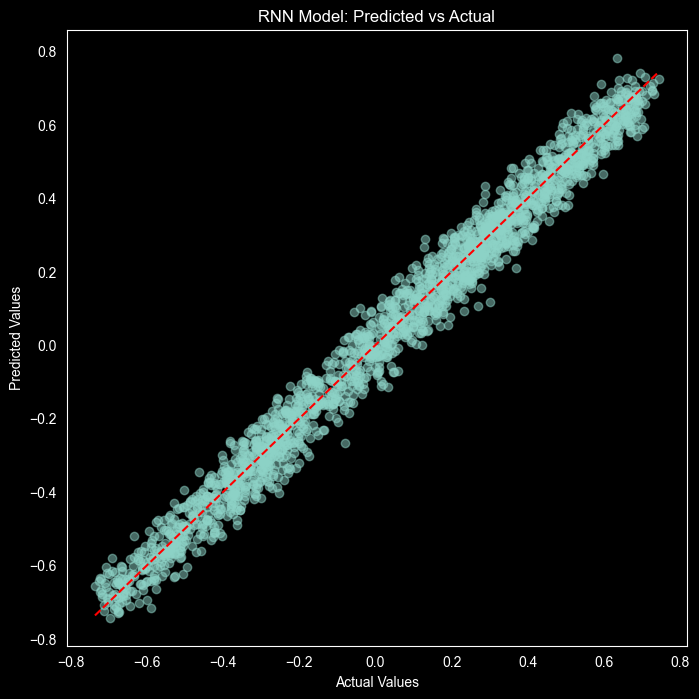

In [21]:
y_pred = model.predict(X_valid)
plot_predicted_vs_actual(y_valid, y_pred, title="RNN Model: Predicted vs Actual")

### Deep RNN Model

In [24]:
model = keras.models.Sequential([
    layers.Input(shape=(None, 1)),
    layers.SimpleRNN(20, return_sequences=True),
    layers.SimpleRNN(20),
    layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
deep_rnn_mse = model.evaluate(X_test, y_test)
print("Deep RNN Model MSE:", deep_rnn_mse)

Epoch 1/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: 0.0281 - val_loss: 0.0053
Epoch 2/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0043 - val_loss: 0.0037
Epoch 3/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0034 - val_loss: 0.0031
Epoch 4/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0031 - val_loss: 0.0030
Epoch 5/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 6/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0029 - val_loss: 0.0030
Epoch 7/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0029 - val_loss: 0.0029
Epoch 8/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 9/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 10/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0027 - val_loss: 0.0027
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026
Deep RNN Model MSE: 0.002614203142002225


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


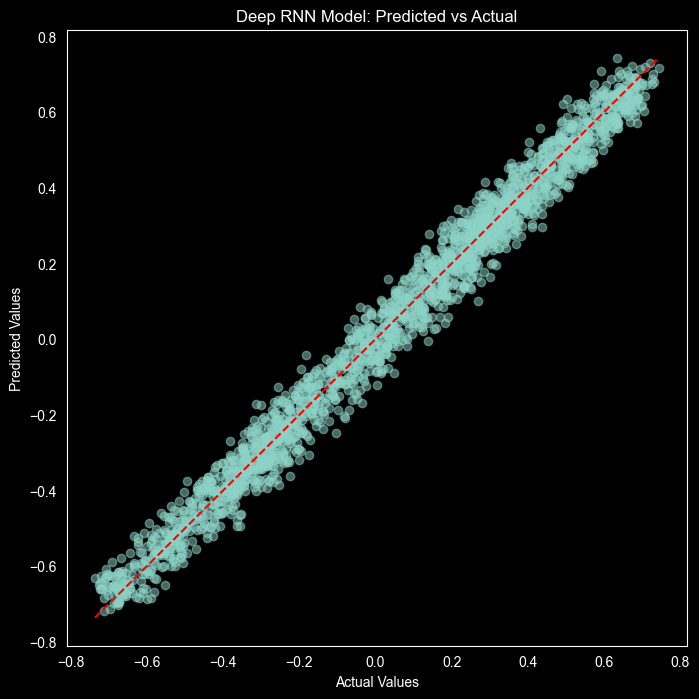

In [25]:
y_pred = model.predict(X_valid)
plot_predicted_vs_actual(y_valid, y_pred, title="Deep RNN Model: Predicted vs Actual")

### Data Forecasting with RNNs

In [26]:
series = generate_time_series(1, n_steps + 10)
X_new, y_new = series[:, :n_steps], series[:, n_steps:]
X = X_new
for step_ahead in range(10):
    y_pred = model.predict(X[:, -n_steps:])
    X = np.concatenate([X, y_pred[:, np.newaxis, :]], axis=1)

y_pred = X[:, n_steps:]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


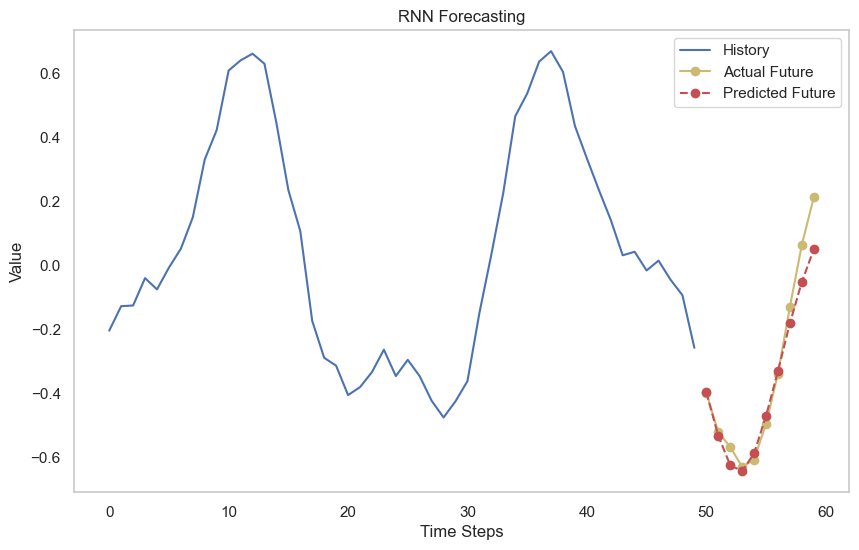

In [28]:
# Plot the results
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.plot(range(n_steps), X_new[0, :n_steps], label="History")
plt.plot(range(n_steps, n_steps + 10), y_new[0], "yo-", label="Actual Future")
plt.plot(range(n_steps, n_steps + 10), y_pred[0], "ro--", label="Predicted Future")
plt.xlabel("Time Steps")
plt.ylabel("Value")
plt.title("RNN Forecasting")
plt.legend()
plt.grid()
plt.show()